In [4]:
! pip install dltk_ai

In [2]:
#importing libraries
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dltk_ai
from dltk_ai import preprocessor
from dltk_ai import visualization as vs
from dltk_ai.dataset_types import Dataset
from sklearn import datasets
import json

In [6]:
data = pd.read_csv(r'C:\Users\ANKANA\Desktop\heart_disease_train.csv')
data

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,62,1,128,208,1,0,140,0,0.0,2,0,2,True
1,0,55,0,180,327,0,2,117,1,3.4,1,0,2,False
2,0,49,0,130,269,0,1,163,0,0.0,2,0,2,True
3,1,62,2,130,231,0,1,146,0,1.8,1,3,3,True
4,1,54,2,120,258,0,0,147,0,0.4,1,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,38,3,120,231,0,1,182,1,3.8,1,0,3,False
268,0,42,0,102,265,0,0,122,0,0.6,1,0,2,True
269,0,69,3,140,239,0,1,151,0,1.8,2,2,2,True
270,0,56,1,140,294,0,0,153,0,1.3,1,0,2,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       272 non-null    int64  
 1   age       272 non-null    int64  
 2   cp        272 non-null    int64  
 3   trestbps  272 non-null    int64  
 4   chol      272 non-null    int64  
 5   fbs       272 non-null    int64  
 6   restecg   272 non-null    int64  
 7   thalach   272 non-null    int64  
 8   exang     272 non-null    int64  
 9   oldpeak   272 non-null    float64
 10  slope     272 non-null    int64  
 11  ca        272 non-null    int64  
 12  thal      272 non-null    int64  
 13  target    272 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 28.0 KB


In [7]:
data.isnull().any()

sex         False
age         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
data.duplicated().any()

True

In [9]:
data.drop_duplicates(keep=False,inplace=True)
data.duplicated().any()

False

In [10]:
pd.DataFrame(abs(data.corr()['target']).sort_values(ascending = False))

,target
target,1.000000
cp,0.445205
exang,0.439215
oldpeak,0.435103
ca,0.431485
thalach,0.426759
thal,0.342657
slope,0.325020
sex,0.277508
age,0.225804


In [11]:
#outliers percentage
import numpy as np
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column sex outliers = 0.00%
Column age outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.07%
Column chol outliers = 1.48%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.37%
Column exang outliers = 0.00%
Column oldpeak outliers = 1.11%
Column slope outliers = 0.00%
Column ca outliers = 7.78%
Column thal outliers = 0.74%
Column target outliers = 0.00%


In [12]:
# drop outliers with z-score over 99.9%
Q1 = data['trestbps'].quantile(0.25)
Q3 = data["trestbps"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

20.0


In [13]:
trestbps_IQR = data[~((data < (Q1 - 1.5 * IQR)) | 
                                 (data > (Q3 + 1.5 * IQR))).any(axis=1)]
trestbps_IQR.shape

(0, 14)

In [14]:
Q1 = data['chol'].quantile(0.25)
Q3 = data['chol'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

63.0


In [15]:
Q1 = data['fbs'].quantile(0.25)
Q3 = data['fbs'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


In [16]:
Q1 = data['thalach'].quantile(0.25)
Q3 = data['thalach'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

33.75


In [17]:
Q1 = data['oldpeak'].quantile(0.25)
Q3 = data['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.75


In [18]:
Q1 = data['ca'].quantile(0.25)
Q3 = data['ca'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [19]:
var_IQR = data[~((data < (Q1 - 1.5 * IQR)) | 
                                 (data > (Q3 + 1.5 * IQR))).any(axis=1)]
var_IQR.shape

(0, 14)

In [20]:
#outliers percentage
import numpy as np
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column sex outliers = 0.00%
Column age outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.07%
Column chol outliers = 1.48%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.37%
Column exang outliers = 0.00%
Column oldpeak outliers = 1.11%
Column slope outliers = 0.00%
Column ca outliers = 7.78%
Column thal outliers = 0.74%
Column target outliers = 0.00%


In [21]:
data1=data.drop(['fbs'], axis = 1) 
data1

,sex,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,62,1,128,208,0,140,0,0.0,2,0,2,True
1,0,55,0,180,327,2,117,1,3.4,1,0,2,False
2,0,49,0,130,269,1,163,0,0.0,2,0,2,True
3,1,62,2,130,231,1,146,0,1.8,1,3,3,True
4,1,54,2,120,258,0,147,0,0.4,1,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,38,3,120,231,1,182,1,3.8,1,0,3,False
268,0,42,0,102,265,0,122,0,0.6,1,0,2,True
269,0,69,3,140,239,1,151,0,1.8,2,2,2,True
270,0,56,1,140,294,0,153,0,1.3,1,0,2,True


In [22]:
def basic_details(data1):
    b = pd.DataFrame()
    b['Missing value, %'] = round(data1.isnull().sum()/data1.shape[0]*100)
    b['N unique value'] = data1.nunique()
    b['dtype'] = data1.dtypes
    return b
basic_details(data1)

,"Missing value, %",N unique value,dtype
sex,0.0,2,int64
age,0.0,41,int64
cp,0.0,4,int64
trestbps,0.0,49,int64
chol,0.0,146,int64
restecg,0.0,3,int64
thalach,0.0,88,int64
exang,0.0,2,int64
oldpeak,0.0,40,float64
slope,0.0,3,int64


In [23]:
def feature_creation(data1):
    for i in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
        for j in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
            data[i + "*" + j] = (data[i]*data[j]) # based on multiplication
            data[i + "_" + j] = data[i].astype('str') + "_" + data[j].astype('str') ## and concatenation

    return data1
data2 = feature_creation(data1)
data2

,sex,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,62,1,128,208,0,140,0,0.0,2,0,2,True
1,0,55,0,180,327,2,117,1,3.4,1,0,2,False
2,0,49,0,130,269,1,163,0,0.0,2,0,2,True
3,1,62,2,130,231,1,146,0,1.8,1,3,3,True
4,1,54,2,120,258,0,147,0,0.4,1,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,38,3,120,231,1,182,1,3.8,1,0,3,False
268,0,42,0,102,265,0,122,0,0.6,1,0,2,True
269,0,69,3,140,239,1,151,0,1.8,2,2,2,True
270,0,56,1,140,294,0,153,0,1.3,1,0,2,True


Number of males and females who have heart diseases

In [24]:
pd.concat([pd.DataFrame(data1['sex'].value_counts()),pd.DataFrame({'sex':['female','male']})],axis=1)

,sex,sex
0,85,female
1,185,male


Pecertage of women and men with heart diseases

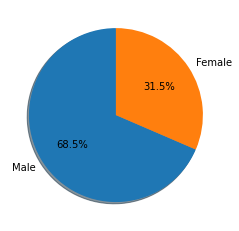

In [25]:
labels = ["Male",'Female']
values = data1['sex'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

How many people of age group 29-48 have blockage greater than 50%?

In [26]:
age_grp_29_48 = pd.concat([data1[(data1['age'] >= 29.0) & (data['age'] < 48.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)
age_grp_29_48.reset_index(inplace=True)
age_grp_29_48.columns = ['target','age','color']
age_grp_29_48

,target,age,color
0,False,19,palegreen
1,True,48,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 29 - 48')

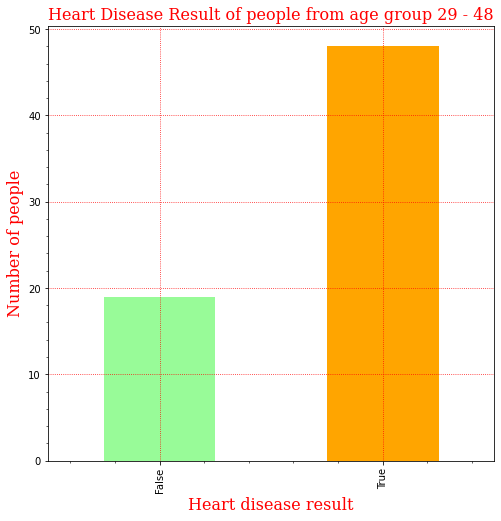

In [27]:
label_style={'family':'serif','color':'red','size':16}
age_grp_29_48.plot(kind='bar',x='target',y='age',figsize=(8,8),color=age_grp_29_48['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='red')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 29 - 48',fontdict=label_style)

In [31]:
# initialize dltk client with API key
client = dltk_ai.DltkAiClient('1874c1b7-ae89-4316-96a2-778828bbfadb')

In [ ]:
#Upload dataset - Training
#train_data_store_response = client.store('heart_disease_train.csv', heart_disease_train)
#print(train_data_store_response)
#train_data = train_data_store_response['fileUrl']

In [ ]:
# Create ML Model - Using Random Forest, weka
#train_response_rf = client.train("classification", "AttributeSelectedClassifier", train_data, "target",['sex', 'age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],"Heart disease Model", "weka", 80, True)
#print(train_response_rf)

In [29]:
# check the job status of training
#train_job_status_response_rf = client.job_status(train_response_rf['data']['jobId'])
#print(train_job_status_response_rf)
# Evaluate ML Model - logistic regression, weka
#train_job_output_response_rf = client.job_output(train_response_rf['data']['jobId'])
#train_job_output_response_rf

#model = train_job_output_response_rf['output']['modelUrl']
#print(train_job_output_response_rf)

IndexError: index 9 is out of bounds for axis 0 with size 9

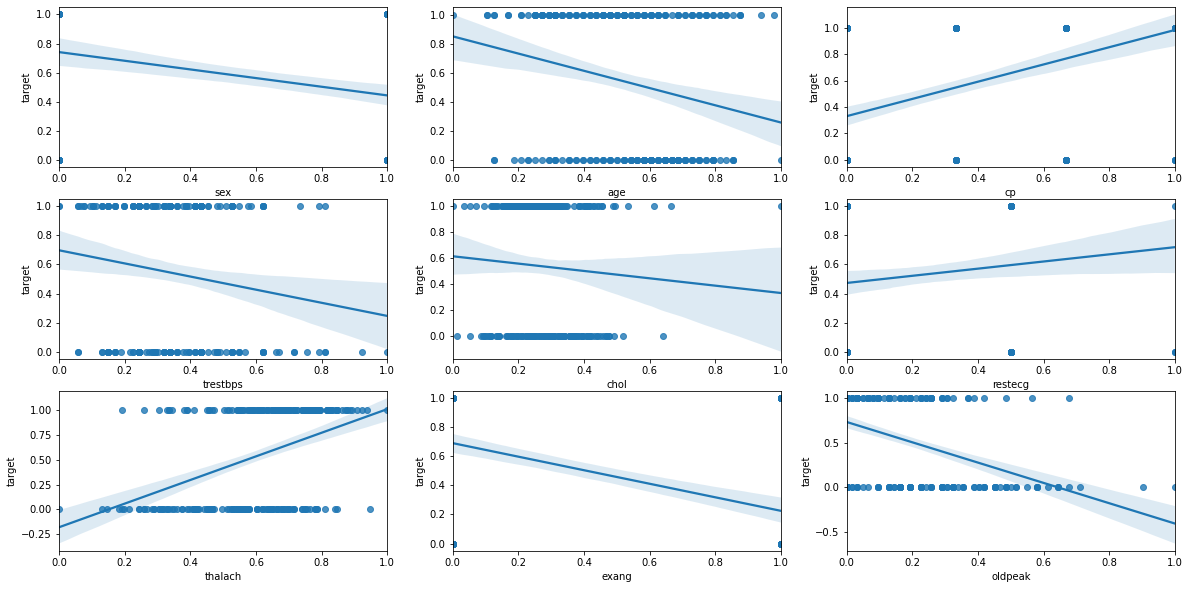

In [32]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['sex','age', 'cp','trestbps','chol','restecg','thalach','exang','oldpeak','slope','ca','thal']
x = data.loc[:,column_sels]
y = data['target']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [12]:
le.fit_transform(data['target'])

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [13]:
data['target'] = le.fit_transform(data.target)
data

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,62,1,128,208,1,0,140,0,0.0,2,0,2,1
1,0,55,0,180,327,0,2,117,1,3.4,1,0,2,0
2,0,49,0,130,269,0,1,163,0,0.0,2,0,2,1
3,1,62,2,130,231,0,1,146,0,1.8,1,3,3,1
4,1,54,2,120,258,0,0,147,0,0.4,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,38,3,120,231,0,1,182,1,3.8,1,0,3,0
268,0,42,0,102,265,0,0,122,0,0.6,1,0,2,1
269,0,69,3,140,239,0,1,151,0,1.8,2,2,2,1
270,0,56,1,140,294,0,0,153,0,1.3,1,0,2,1


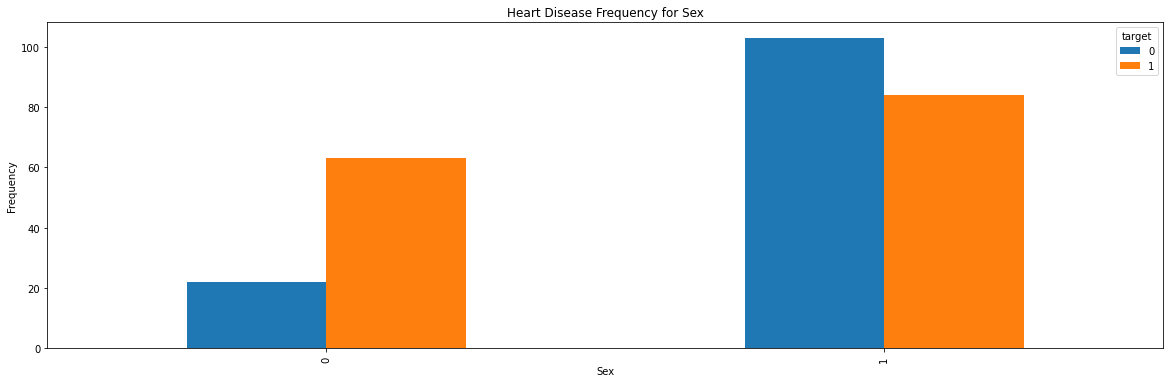

In [15]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

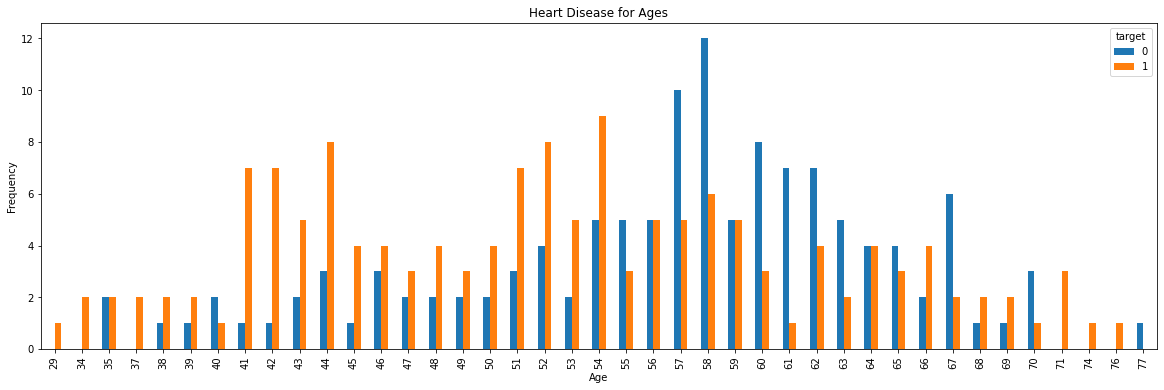

In [16]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
features = data.iloc[:, 0:13]
label = data['target']
features

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,62,1,128,208,1,0,140,0,0.0,2,0,2
1,0,55,0,180,327,0,2,117,1,3.4,1,0,2
2,0,49,0,130,269,0,1,163,0,0.0,2,0,2
3,1,62,2,130,231,0,1,146,0,1.8,1,3,3
4,1,54,2,120,258,0,0,147,0,0.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,38,3,120,231,0,1,182,1,3.8,1,0,3
268,0,42,0,102,265,0,0,122,0,0.6,1,0,2
269,0,69,3,140,239,0,1,151,0,1.8,2,2,2
270,0,56,1,140,294,0,0,153,0,1.3,1,0,2


In [22]:
from sklearn import ensemble
clf_rand = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression 
clf_log = LogisticRegression(random_state = 0)  
from sklearn.tree import DecisionTreeClassifier
clf_dectree = DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=3)

In [24]:
clf_rand.fit(X_train, y_train)
clf_log.fit(X_train, y_train)
clf_dectree.fit(X_train,y_train)
clf_gnb.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [25]:
pred_rand = clf_rand.predict(X_test)
pred_log = clf_log.predict(X_test)
pred_dectree = clf_dectree.predict(X_test)
pred_NB = clf_gnb.predict(X_test)
pred_knn = clf_knn.predict(X_test)

In [26]:
print(pred_rand)
print(pred_log)
print(pred_dectree)
print(pred_NB)
print(pred_knn)

[False  True False False  True False  True  True  True False  True False
  True False  True False  True False  True False  True False  True False
 False  True False  True]
[False  True  True False  True False  True  True  True False  True False
  True False  True False  True False  True False  True False  True False
 False  True False  True]
[False  True False  True  True False False  True  True False  True  True
  True False  True False  True False  True False  True  True False False
 False  True False  True]
[False  True  True  True  True False  True  True  True False  True  True
  True False  True False  True False  True  True False False False False
 False  True False  True]
[False False  True  True  True  True  True  True  True False  True  True
  True False False False False False False  True  True  True False  True
  True  True  True  True]


In [27]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, pred_rand)
print(cm1)

[[12  0]
 [ 2 14]]


In [28]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, pred_log)
print(cm2)

[[12  0]
 [ 1 15]]


In [29]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, pred_dectree)
print(cm3)

[[ 9  3]
 [ 4 12]]


In [30]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, pred_NB)
print(cm4)

[[ 9  3]
 [ 3 13]]


In [31]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, pred_knn)
print(cm5)

[[ 5  7]
 [ 5 11]]


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rand)

0.9285714285714286

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_log)

0.9642857142857143

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dectree)

0.75

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_NB)

0.7857142857142857

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_knn)

0.5714285714285714